In [50]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

In [30]:
df=pd.read_csv('sample_data/heart.csv',usecols=['age','chol'])
df.head()

,age,chol
0,52,212
1,53,203
2,70,174
3,61,203
4,62,294


In [31]:
df.isnull().sum()

,0
age,0
chol,0


**Feature Scaling**

In [33]:
data=MinMaxScaler().fit_transform(df)

**Model Construction**

In [34]:
model=KMeans(n_clusters=3,init='random',random_state=42,n_init=100)
model.fit(data)
y_predict=model.predict(data)
df['Cluster']=model.fit_predict(data)

In [35]:
df.head()

,age,chol,Cluster
0,52,212,1
1,53,203,1
2,70,174,0
3,61,203,1
4,62,294,0


In [36]:
centers = model.cluster_centers_
print('Cluster Heads  : ',centers)

Cluster Heads  :  [[0.72354497 0.35096035]
 [0.55463742 0.24010472]
 [0.2873441  0.23940764]]


In [37]:
print('Predicted Labels : ',y_predict)

Predicted Labels :  [1 1 0 ... 2 1 1]


**Visualization**

Text(0, 0.5, 'Chol')

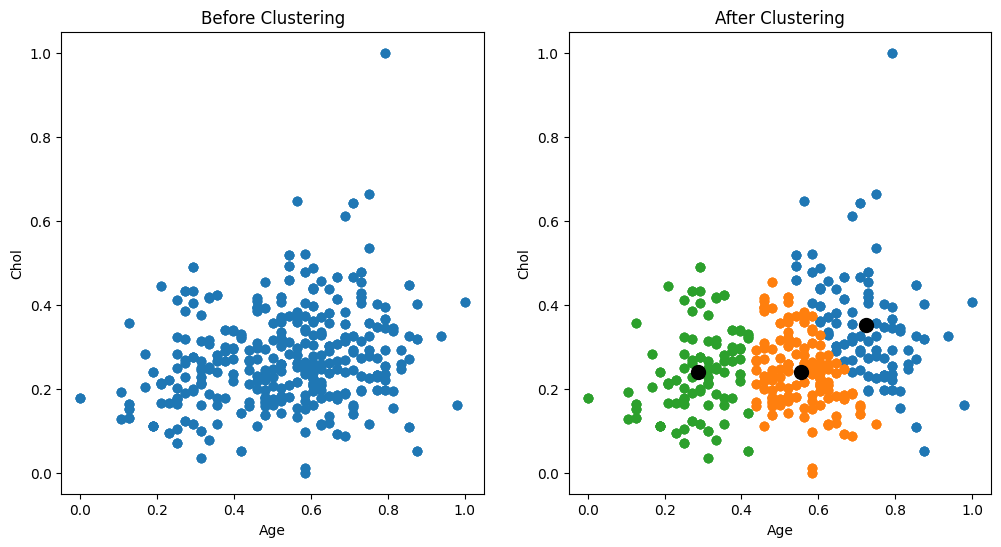

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].scatter(data[:,0], data[:,1])
ax[0].set_title("Before Clustering")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Chol")

for cluster in np.unique(y_predict):
    row=np.where(y_predict == cluster)
    ax[1].scatter(data[row,0],data[row,1])

ax[1].scatter(centers[:, 0], centers[:, 1], s=100, color='k')
ax[1].set_title("After Clustering")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Chol")

**Elbow Method**

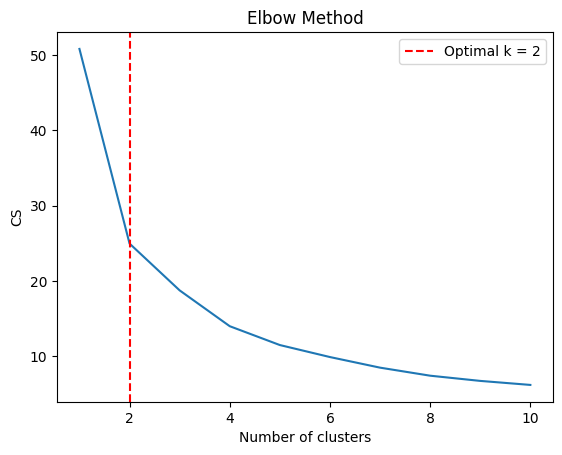

Optimal number of clusters is: 2


In [52]:
cs = []
K_range = range(1, 11)

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    cs.append(kmeans.inertia_)

first_derivative = np.diff(cs)
second_derivative = np.diff(first_derivative)
optimal_k = np.argmax(second_derivative) + 2

plt.plot(range(1, 11), cs)
plt.axvline(x=optimal_k,color='r',linestyle='--', label=f"Optimal k = {optimal_k}")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.legend()
plt.show()

print(f"Optimal number of clusters is: {optimal_k}")


**Silhoutte Score**

In [53]:
sil_score=silhouette_score(data,y_predict)

print(f"Silhouette Score for k={optimal_k}: {sil_score}")

Silhouette Score for k=2: 0.3462086080411855


**Cluster Approximation Error**

In [54]:
print(f"Cluster Approximation Error for k={optimal_k}: {cs}")

Cluster Approximation Error for k=2: [50.78838618512326, 24.950276185218335, 18.73520603878099, 13.980391322467213, 11.47950161952676, 9.886096181793594, 8.478606496848348, 7.411324815150294, 6.719667444143589, 6.186260777362826]
